In [3]:
# Constants
TRAIN_FRACTION = 0.7
RANDOM_SEED = 86720

In [4]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [5]:
df = pd.read_csv(r"..\..\data\diabetes\diabetes.csv")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
train_data = df.sample(frac=TRAIN_FRACTION,random_state=RANDOM_SEED)

In [9]:
train_index = list(train_data.index)

In [10]:
test_data = df.drop(train_index)

In [11]:
test_index = list(test_data.index)

In [12]:
features = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

In [13]:
x_test = test_data[features]

In [14]:
y_test = test_data['Outcome']

In [15]:
x_train = train_data[features]
y_train = train_data['Outcome']

In [16]:
print(f"Number of diabetic patients in training - {sum(y_train)}")
print(f"Number of non-diabetic patients in training - {sum(1-(y_train))}")

Number of diabetic patients in training - 202
Number of non-diabetic patients in training - 336


In [17]:
print(f"Number of diabetic patients in test - {sum(y_test)}")
print(f"Number of non-diabetic patients in test - {sum(1-(y_test))}")

Number of diabetic patients in test - 66
Number of non-diabetic patients in test - 164


In [18]:
x_test.shape

(230, 8)

In [19]:
max_depth_tree = 1

#### Entropy Metric - Best Split

In [20]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth_tree)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

[Text(0.5, 0.75, 'Glucose <= 123.5\nentropy = 0.955\nsamples = 538\nvalue = [336, 202]'),
 Text(0.25, 0.25, 'entropy = 0.721\nsamples = 301\nvalue = [241, 60]'),
 Text(0.75, 0.25, 'entropy = 0.971\nsamples = 237\nvalue = [95, 142]')]

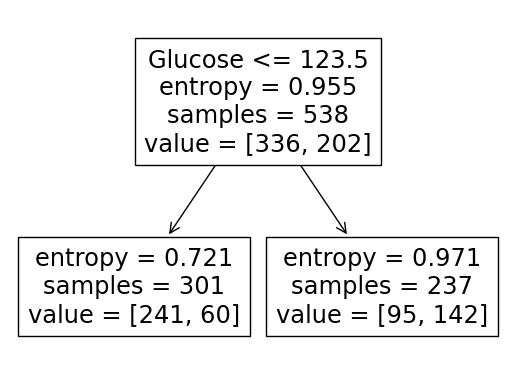

In [21]:
tree.plot_tree(dtree,feature_names=features)

Accuracy score: 71.18959107806691
Recall Score: 70.29702970297029
Precision score: 59.91561181434599


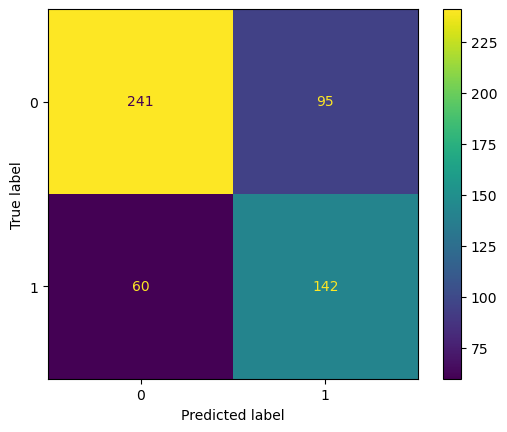

In [28]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

Accuracy score: 74.34782608695653
Recall Score: 69.6969696969697
Precision score: 54.11764705882353


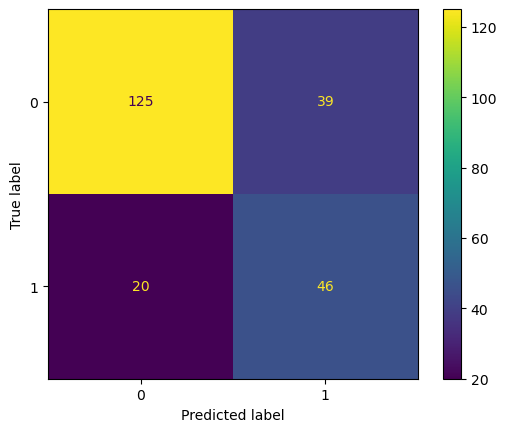

In [25]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

In [31]:
records=[]
for depth in range(1,20):
    dtree = DecisionTreeClassifier(criterion="entropy",max_depth=depth)
    dtree.fit(x_train,y_train)
    y_pred = dtree.predict(x_test)

    Accuracy= 100*metrics.accuracy_score(y_test,y_pred)
    Recall=100*metrics.recall_score(y_test,y_pred)
    Precision= 100*metrics.precision_score(y_test,y_pred)
    FPR = 100*(1-metrics.recall_score(y_test,y_pred,pos_label=0))
    records.append([depth,Accuracy,Recall,Precision,FPR])
df=pd.DataFrame.from_records(records,columns=['Depth','Accuracy','Recall','Precision','FPR'])

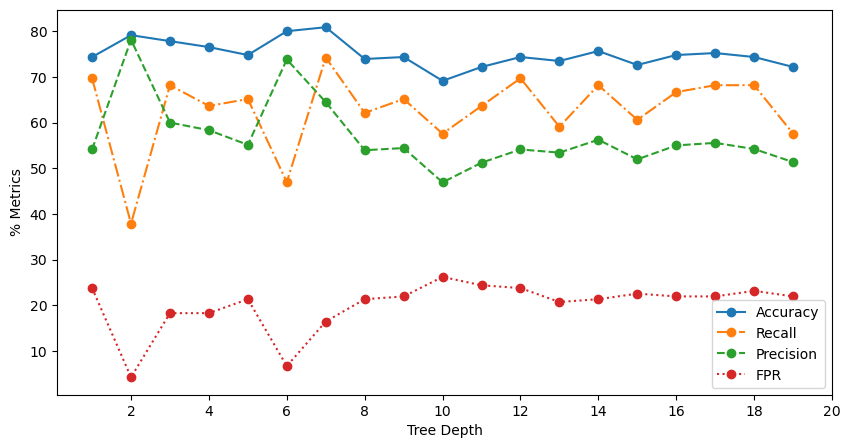

In [43]:
plt.figure(figsize=[10,5])
plt.plot(df['Depth'],df['Accuracy'],'-o')
plt.plot(df['Depth'],df['Recall'],'-.o')
plt.plot(df['Depth'],df['Precision'],'--o')
plt.plot(df['Depth'],df['FPR'],':o')
plt.xticks([2,4,6,8,10,12,14,16,18,20])
plt.xlabel('Tree Depth')
plt.ylabel('% Metrics')
plt.legend(['Accuracy','Recall','Precision','FPR'])
plt.show()
plt.close()

#### Gini Metric - Best Split

In [ ]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=max_depth_tree)
dtree.fit(x_train,y_train)



In [ ]:
tree.plot_tree(dtree,feature_names=features)

In [ ]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

In [ ]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Entropy Metric - Random Split

In [ ]:
dtree = DecisionTreeClassifier(criterion="entropy",max_depth=max_depth_tree,splitter="random")
dtree.fit(x_train,y_train)

In [ ]:
tree.plot_tree(dtree,feature_names=features)

In [ ]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

In [ ]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")

#### Gini Metric - Random Split

In [ ]:
dtree = DecisionTreeClassifier(criterion="gini",max_depth=max_depth_tree,splitter="random")
dtree.fit(x_train,y_train)

In [ ]:
tree.plot_tree(dtree,feature_names=features)

In [ ]:
#### Confusion matrix for training data
y_pred = dtree.predict(x_train)
metrics.ConfusionMatrixDisplay.from_predictions(y_train,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_train,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_train,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_train,y_pred)}")

In [ ]:
#### Confusion matrix for test data
y_pred = dtree.predict(x_test)
metrics.ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
print(f"Accuracy score: {100*metrics.accuracy_score(y_test,y_pred)}")
print(f"Recall Score: {100*metrics.recall_score(y_test,y_pred)}")
print(f"Precision score: {100*metrics.precision_score(y_test,y_pred)}")